# 5Ï£ºÏ∞® Í≥ºÏ†ú - XAI

ÏïàÎÖïÌïòÏÑ∏Ïöî! Î™®ÎëêÎì§ 5Ï£ºÏ∞® ÏÑ∏ÏÖòÍπåÏßÄ Ïò§ÏãúÎäêÎùº ÏàòÍ≥† ÎßéÏúºÏÖ®ÏäµÎãàÎã§ üòä  
Ïù¥Î≤à Í≥ºÏ†úÏóêÏÑúÎäî ÏÑ∏ÏÖòÏóêÏÑú ÏÜåÍ∞úÌïú ÎåÄÌëúÏ†ÅÏù∏ XAI Í∏∞Î≤ï Ï§ë **SHAP, Grad-CAM**ÏùÑ Í∞ÑÎã®Ìûà Íµ¨ÌòÑÌï¥ Î≥¥Î©¥ÏÑú Í∞ÅÍ∞ÅÏùò ÌäπÏßïÍ≥º ÌôúÏö© Î∞©Î≤ïÏùÑ ÏßÅÏ†ë ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.




## 1Î≤à
Î®ºÏ†Ä, ÏùòÎ£å Îç∞Ïù¥ÌÑ∞(Stroke Prediction Data)Î•º ÌôúÏö©Ìï¥ Í∞ÑÎã®Ìïú ÏòàÏ∏° Î™®Îç∏ÏùÑ ÎßåÎì§Í≥†,  
**SHAP**ÏùÑ Ïù¥Ïö©Ìï¥ **Î™®Îç∏Ïù¥ Ïñ¥Îñ§ Í∑ºÍ±∞Î°ú ÌåêÎã®ÌñàÎäîÏßÄ** ÏßÅÏ†ë ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.  

ÌäπÌûà SHAPÏùÄ ÏùòÎ£å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóêÏÑú **ÌäπÏ†ï ÌôòÏûêÏùò ÏòàÏ∏° Í∑ºÍ±∞Î•º ÏÑ§Î™Ö**Ìï† Îïå ÏûêÏ£º ÏÇ¨Ïö©ÎêòÎäî Í∏∞Î≤ïÏûÖÎãàÎã§.  
Î®ºÏ†Ä ÎáåÏ°∏Ï§ë ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÎßåÎì§Í≥†, global/local ÏÑ§Î™ÖÏùÑ Ï∂úÎ†•Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

### 1) Import Library


In [8]:
import os, random, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import shap
import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED); random.seed(SEED)


### 2) Data Load
KaggleHubÏùÑ Ïù¥Ïö©Ìï¥ Stroke Prediction DatasetÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.  


In [9]:
USE_KAGGLEHUB = True
df = None
import kagglehub
from kagglehub import KaggleDatasetAdapter
file_path = "healthcare-dataset-stroke-data.csv"
df = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "fedesoriano/stroke-prediction-dataset",
      file_path,
      )

print("Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df.shape)
df.head()


Using Colab cache for faster access to the 'stroke-prediction-dataset' dataset.
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

### 3) Data Preprocessing
- Î∂àÌïÑÏöî Ïª¨Îüº(id) Ï†úÍ±∞  
- `gender`Ïùò Ìù¨Í∑ÄÍ∞í(Other)ÏùÑ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥  
- ÏàòÏπòÌòï: ÌèâÍ∑† ÎåÄÏπò + ÌëúÏ§ÄÌôî  
- Î≤îÏ£ºÌòï: ÏµúÎπà ÎåÄÏπò + Ïõê-Ìï´ Ïù∏ÏΩîÎî©

Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù¥Í≥† ÌëúÏ§ÄÏ†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ïÏùÑ Ï†ÅÏö©ÌñàÏäµÎãàÎã§. Îçî Ï†ïÍµêÌïú Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÎêòÎ©¥ ÏûêÏú†Î°≠Í≤å Ï†ÑÏ≤òÎ¶¨Î•º Ï∂îÍ∞ÄÌï¥ Î≥¥ÏÖîÎèÑ Ï¢ãÏäµÎãàÎã§ :)

In [10]:
target_col = "stroke"
df = df.drop(columns=["id"], errors="ignore")

X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

num_cols = X.select_dtypes(include=["int64","float64","int32","float32"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

numeric_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])


### 4) Train/Test Split
Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú `stratify=y` ÏòµÏÖòÏùÑ ÏÇ¨Ïö©Ìï¥ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Î•º Ïú†ÏßÄÌïòÏòÄÏäµÎãàÎã§.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)


### 5) Î™®Îç∏ ÌïôÏäµ
ÏÑ∏ Í∞ÄÏßÄ Î™®Îç∏(RandomForestClassifier, XGBClassifier, LGBMClassifier)ÏùÑ ÌïôÏäµÌï¥Î≥¥Í≥†  
AUROC, AUPRC Îì± ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï©ÎãàÎã§.

ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏÑ∏ Î™®Îç∏ Ïù¥Ïô∏Ïùò Îã§Î•∏ Î™®Îç∏ÏùÑ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏãúÎèÑÌï¥Î≥¥Í≥† Ïã∂ÏúºÏã† Î∂ÑÏùÄ ÏûêÏú†Î°≠Í≤å ÏßÑÌñâÌï¥Ï£ºÏÑ∏Ïöî!

In [12]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [13]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "RF": RandomForestClassifier(
        n_estimators=300,
        random_state=SEED,
        class_weight="balanced_subsample",
        n_jobs=-1
    ),
    "XGB": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=SEED,
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    "LGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=-1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=SEED,
        class_weight="balanced"
    ),
    "CatBoost": CatBoostClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bylevel=0.8,
        random_state=SEED,
        verbose=0
    )
}


results = {}
for name, clf in models.items():
    pipe = Pipeline([("prep", preprocess), ("clf", clf)])
    pipe.fit(X_train, y_train)

    pred_prob = pipe.predict_proba(X_test)[:,1]
    pred = (pred_prob >= 0.5).astype(int)
    auroc = roc_auc_score(y_test, pred_prob)
    aupr  = average_precision_score(y_test, pred_prob)
    print(f"\n=== {name} ===")
    print(f"AUROC={auroc:.3f}  AUPRC={aupr:.3f}")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, digits=3))
    results[name] = pipe



=== RF ===
AUROC=0.775  AUPRC=0.141
[[971   1]
 [ 50   0]]
              precision    recall  f1-score   support

           0      0.951     0.999     0.974       972
           1      0.000     0.000     0.000        50

    accuracy                          0.950      1022
   macro avg      0.476     0.499     0.487      1022
weighted avg      0.905     0.950     0.927      1022


=== XGB ===
AUROC=0.816  AUPRC=0.212
[[965   7]
 [ 45   5]]
              precision    recall  f1-score   support

           0      0.955     0.993     0.974       972
           1      0.417     0.100     0.161        50

    accuracy                          0.949      1022
   macro avg      0.686     0.546     0.568      1022
weighted avg      0.929     0.949     0.934      1022

[LightGBM] [Info] Number of positive: 199, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overh

**Q1.** ÏÑ∏ Í∞ÄÏßÄ Î™®Îç∏(ÎòêÎäî Ï∂îÍ∞ÄÎ°ú ÏãúÎèÑÌïú Î™®Îç∏) Ï§ë ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïú Î™®Îç∏ÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?
Í∑∏Î¶¨Í≥† Í∑∏ Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïú Ïù¥Ïú†Î•º ÏÑ±Îä• ÏßÄÌëúÎÇò Ìï¥ÏÑù Ïö©Ïù¥ÏÑ± Í¥ÄÏ†êÏóêÏÑú ÏÑ§Î™ÖÌï¥ Ï£ºÏÑ∏Ïöî.

**A. AUROC Î∞è AUPRCÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌïòÏó¨, ÎÑ§ Í∞ÄÏßÄ Î™®Îç∏ Ï§ë XGBoostÎ•º ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïòÏòÄÎã§.**

Í∏∞Ï§ÄÏù∏ AUROCÏôÄ AUPRCÎäî Í∞ÅÍ∞Å Area Under the Receiver Operating Characteristic CurveÏôÄ Area Under the Precision-Recall CurveÎ°ú, AUROCÎäî Í≥°ÏÑ†Ïù¥ ÏôºÏ™Ω ÏúÑÎ°ú Ìñ•Ìï† ÏàòÎ°ù(= FPRÏù¥ ÎÇÆÍ≥†, TPRÏù¥ ÎÜíÏùÑ ÏàòÎ°ù) Ï¢ãÍ≥†, AUPRCÎäî Í≥°ÏÑ†Ïù¥ Ïò§Î•∏Ï™Ω ÏúÑÎ°ú Ìñ•Ìï† ÏàòÎ°ù (= RecallÍ≥º PrecisionÏù¥ ÎÜíÏùÑ ÏàòÎ°ù) Ï¢ãÏùÄ Î™®Îç∏Î°ú ÌåêÎã®ÌïúÎã§. Ï†ïÎ¶¨ÌïòÏó¨, **Îëê Í∞ÄÏßÄ Í∏∞Ï§Ä Í∞íÏù¥ ÎÜíÏùÄ Î™®Îç∏ÏùºÏàòÎ°ù Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Ï¢ãÏùÄ Î™®Îç∏Ïù¥Îùº ÌåêÎã®Ìï† Ïàò ÏûàÎã§.**

ÏúÑ Ïã§Ìóò Í≤∞Í≥º, XGBClassifierÏùò ÏÑ±Îä•(AUROC=0.816  AUPRC=0.212)ÏùÄ RFClassifier(AUROC=0.775  AUPRC=0.141)ÏôÄ LGBMClassifier(AUROC=0.809  AUPRC=0.196)Ïùò ÏÑ±Îä•Î≥¥Îã§ ÌôïÏó∞Ìûà ÎÜíÎã§. CatBoostClassifierÏùò Í≤ΩÏö∞(AUROC=0.817  AUPRC=0.198), AUROCÏùò Í∞íÏù¥ 0.001Ï†êÏù¥ Îí§Ï≥êÏßÄÎÇò, AUPRCÏùò Í∞íÏù¥ Ìõ®Ïî¨ ÎÜíÎã§.

ÎòêÌïú XGBoostÎäî Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏Ïù¥ÎØÄÎ°ú, (Ï∂îÍ∞Ä ÏΩîÎìú ÏûÖÎ†• Ïãú) **Î≥ÄÏàò Ï§ëÏöîÎèÑ(feature importance)Î•º Ï†úÍ≥µÌï¥ÏÑú Î™®Îç∏Ïù¥ Ïñ¥Îñ§ Î≥ÄÏàòÎ•º Ï§ëÏöîÌïòÍ≤å ÌåêÎã®ÌñàÎäîÏßÄ ÌååÏïÖ Í∞ÄÎä•**ÌïòÍ≥†, Ïù¥Îäî Î™®Îç∏Ïùò Í≤∞Ï†ï Í≥ºÏ†ïÏùÑ ÏÑ§Î™Ö Í∞ÄÎä•ÌïòÍ≤å ÌïúÎã§. **Ï†ïÎ¶¨ÌïòÏó¨ XGBClassifierÎäî ÌÉÄ Î™®Îç∏ ÎåÄÎπÑ ÏÑ±Îä• ÏßÄÌëúÏóêÏÑú ÏïûÏÑúÍ≥†, ÎÇòÏïÑÍ∞Ä Ìï¥ÏÑù Ïö©Ïù¥ÏÑ±Ïù¥ ÎÜíÏïÑ Î™®Îç∏Ïùò Ïã†Î¢∞ÏÑ±ÏùÑ ÎÜíÏó¨Ï£ºÍ∏∞Ïóê ÏµúÏ¢Ö ÏÑ†ÌÉùÌïòÏòÄÎã§.**

### 6) SHAP ÏÑ§Î™Ö ÎåÄÏÉÅ Î™®Îç∏ ÏÑ†ÌÉù
ÏúÑ ÎãµÎ≥ÄÏùò Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïòÏó¨ ÏßÑÌñâÌï©ÎãàÎã§.

In [14]:
model = results["XGB"]  # ÏÑ†ÌÉùÌïú Î™®Îç∏ Ïù¥Î¶ÑÏùÑ Ï†ÅÏñ¥Ï£ºÏÑ∏Ïöî

In [15]:
prep = model.named_steps["prep"]
feature_names = num_cols.copy()
if len(cat_cols) > 0:
    ohe = prep.named_transformers_["cat"].named_steps["ohe"]
    cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()
    feature_names = num_cols + cat_feature_names


### 7) SHAP Í∞í Í≥ÑÏÇ∞
- ÏÇ¨Ïö©Ìïú Î™®Îç∏Ïù¥ Î™®Îëê Ìä∏Î¶¨ Î™®Îç∏Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê `TreeExplainer` ÏÇ¨Ïö©Ìï©ÎãàÎã§!
- ÎßåÏïΩ, Í∑∏ Ïô∏ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìïú Í≤ΩÏö∞, `KernelExplainer`Î°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî


In [16]:
X_train_tx = prep.transform(X_train)
X_test_tx  = prep.transform(X_test)

X_test_tx_df = pd.DataFrame(X_test_tx, columns=feature_names)

explainer = shap.TreeExplainer(model.named_steps["clf"])
shap_result = explainer(X_test_tx, check_additivity=False)
shap_for_pos = shap_result.values[:, :, 1] if shap_result.values.ndim == 3 else shap_result.values

### 9) SHAP ÏãúÍ∞ÅÌôî
- **Summary Plot**: Ï†ÑÏó≠Ï†ÅÏúºÎ°ú Ïñ¥Îñ§ ÌîºÏ≤òÍ∞Ä Ï§ëÏöîÌïúÏßÄ  
- **Bar Plot**: Îã®Ïàú Ï§ëÏöîÎèÑ ÎßâÎåÄ  
- **Waterfall Plot**: Í∞úÎ≥Ñ ÏÉòÌîåÏóê ÎåÄÌïú Íµ≠ÏÜå ÏÑ§Î™Ö


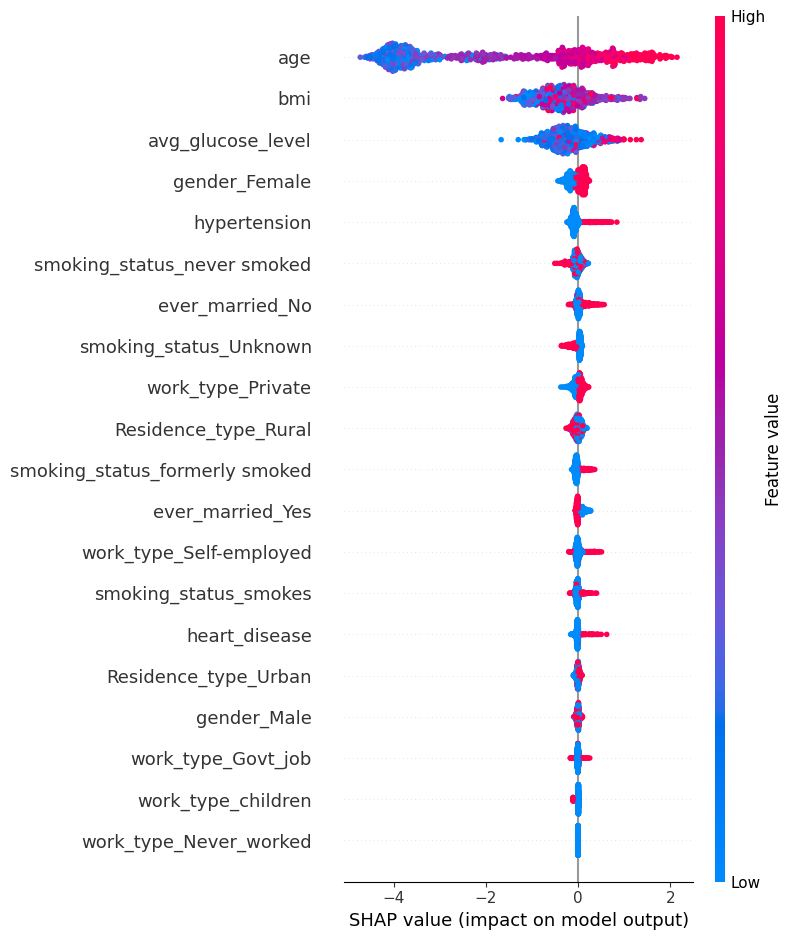

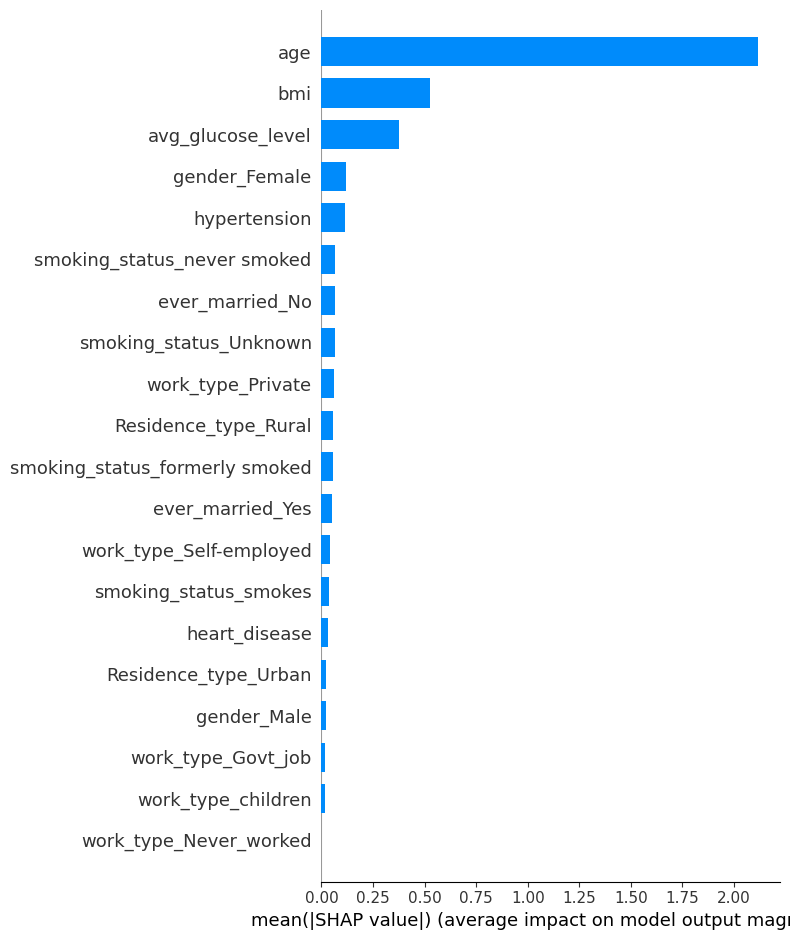

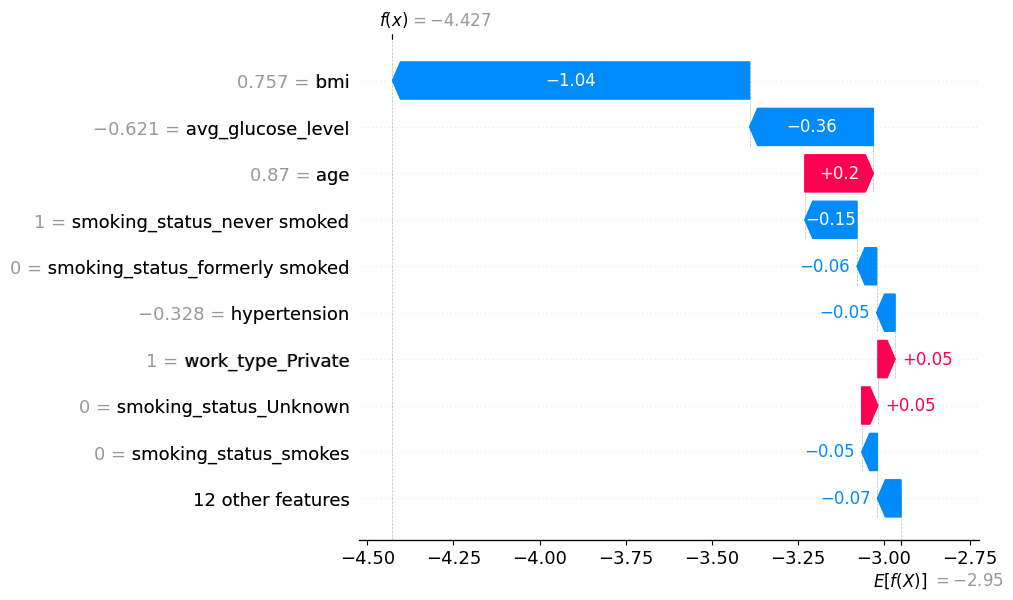

In [17]:
X_shap = X_test_tx_df

shap.initjs()

# Summary plot
shap.summary_plot(shap_for_pos, X_shap, feature_names=feature_names)

# Bar plot
shap.summary_plot(shap_for_pos, X_shap, feature_names=feature_names, plot_type="bar")

# Waterfall
sample_i = 0
sv_row = shap_for_pos[sample_i]

expected_value = explainer.expected_value
if isinstance(expected_value, (list, np.ndarray)) and len(expected_value) > 1:
    expected_value = expected_value[1]

shap.plots.waterfall(
    shap.Explanation(
        values=sv_row,
        base_values=expected_value,
        feature_names=feature_names,
        data=X_shap.iloc[sample_i]
    )
)


**Q2.** Summary plot/bar plot Í≤∞Í≥ºÏóê ÎåÄÌïòÏó¨, **ÏÉÅÏúÑ 3Í∞ú ÌîºÏ≤ò**Í∞Ä Î™®Îç∏Ïóê Ïñ¥Îñ§ ÏùòÎØ∏Î•º Ï£ºÎäîÏßÄ ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî.  

**A Summary plot/bar plot Í≤∞Í≥º, ÏÉÅÏúÑ 3Í∞ú ÌîºÏ≤òÎäî 'age', 'bmi', 'avg_glucose_level'Ïù¥ ÏÉÅÏúÑ 3Í∞ú ÌîºÏ≤òÏù¥Îã§.**

Î®ºÏ†Ä bmiÎäî Î™®Îç∏ ÏòàÏ∏°Ïóê Í∞ÄÏû• ÌÅ∞ Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÌîºÏ≤òÎ°ú, valueÎäî 0.757Î°ú ÎÇòÌÉÄÎÇ¨Í≥†, ÌååÎûÄÏÉâ ÎßâÎåÄÍ∞Ä ÏôºÏ™ΩÏúºÎ°ú Í∞ÄÏû• Í∏∏Í≤å ÎªóÏñ¥ÏûàÎã§. Ïù¥Îäî Ìï¥Îãπ ÏÉòÌîåÏùò bmi Í∞íÏù¥ Î™®Îç∏Ïù¥ ÏòàÏ∏°ÌïòÎ†§Îäî Í∏çÏ†ï ÌÅ¥ÎûòÏä§Ïùò Í∞ÄÎä•ÏÑ±ÏùÑ ÌÅ¨Í≤å ÎÇÆÏ∂òÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.

ÎèôÏùºÌïú Ïó∞Ïú†Î°ú, avg_glucose_level ÎòêÌïú Îëê Î≤àÏß∏Î°ú ÌÅ∞ Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÌîºÏ≤òÎ°ú, -0.621Ïù¥ÎûÄ ÎÇÆÏùÄ ÌèâÍ∑† ÌòàÎãπ ÏàòÏπòÍ∞Ä Î™®Îç∏Ïùò ÏòàÏ∏°ÏùÑ Í∞êÏÜåÏãúÏº∞Îã§ Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

ÎßàÏßÄÎßâÏúºÎ°ú ageÎäî ÏÑ∏ Î≤àÏß∏Î°ú Ï§ëÏöîÌïú ÌîºÏ≤òÏù¥Î©∞, ÏÑ∏ ÏÉÅÏúÑ ÌîºÏ≤ò Ï§ë Ïú†ÏùºÌïòÍ≤å Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§. age Í∞í 0.87ÏùÄ Îπ®Í∞ÑÏÉâ ÎßâÎåÄÎ°ú ÌëúÏãúÎêòÏñ¥ ÏòàÏ∏°Í∞íÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Î∞©Ìñ•ÏúºÎ°ú ÏûëÏö©ÌñàÎã§. Ï¶â, Ìï¥Îãπ ÏÉòÌîåÏùò ÎÇòÏù¥Í∞Ä ÎßéÏùÑÏàòÎ°ù Í∏çÏ†ï ÌÅ¥ÎûòÏä§Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßÑÎã§Í≥† Î™®Îç∏ÏùÄ ÌåêÎã®ÌïúÎã§.

## 2Î≤à

Ïù¥Î≤àÏóêÎäî Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî ÎåÄÌëúÏ†ÅÏù∏ XAI Í∏∞Î≤ïÏù∏ **Grad-CAM**ÏùÑ ÌôúÏö©Ìï¥Î¥ÖÎãàÎã§.  
Grad-CAMÏùÄ Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßù(CNN)Ïùò ÎßàÏßÄÎßâ Convolution LayerÏùò GradientÎ•º ÌôúÏö©ÌïòÏó¨,  
Î™®Îç∏Ïù¥ Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏùÑ Î≥¥Í≥† Ìï¥Îãπ ÌÅ¥ÎûòÏä§Î°ú ÏòàÏ∏°ÌñàÎäîÏßÄ **ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÏÑ§Î™Ö**Ìï¥Ï£ºÎäî Î∞©Î≤ïÏûÖÎãàÎã§.

### 0) ÌôòÍ≤Ω Ï§ÄÎπÑ
Grad-CAM Íµ¨ÌòÑÏóê ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄÎì§ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.  
- `ResNet50` : ÏÇ¨Ï†Ñ ÌïôÏäµÎêú ÎåÄÌëúÏ†ÅÏù∏ CNN Î™®Îç∏  
- `image` : Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨Ïóê ÌôúÏö©  
- `matplotlib` : Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import resnet50, ResNet50
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### 1) ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
`ImageNet` Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµÎêú **ResNet50** Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.  
Ïù¥ Î™®Îç∏ÏùÄ 1,000Í∞úÏùò ÌÅ¥ÎûòÏä§Î•º Î∂ÑÎ•òÌï† Ïàò ÏûàÏúºÎ©∞, Ïö∞Î¶¨Í∞Ä Î∂àÎü¨Ïò¨ Ïù¥ÎØ∏ÏßÄÎ•º Ïñ¥Îñ§ ÌÅ¥ÎûòÏä§Î°ú Ïù∏ÏãùÌïòÎäîÏßÄÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.



In [19]:
model = ResNet50(weights = 'imagenet')
model.summary()

102967424/102967424 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step


Model: "resnet50"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer         ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_pad           ‚îÇ (None, 230, 230,  ‚îÇ          0 ‚îÇ input_layer[0][0] ‚îÇ
‚îÇ (ZeroPadding2D)     ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_conv (Conv2D) ‚îÇ (None, 112, 112,  ‚îÇ      9,472 ‚îÇ conv1_pad[0][0]   ‚îÇ
‚îÇ                     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_bn            ‚îÇ (None, 112, 112,  ‚îÇ        256 ‚îÇ conv1_conv[0][0]  ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_relu          ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ conv1_bn[0][0]    ‚îÇ
‚îÇ (Activation)        ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pool1_pad           ‚îÇ (None, 114, 114,  ‚îÇ          0 ‚îÇ conv1_relu[0][0]  ‚îÇ
‚îÇ (ZeroPadding2D)     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pool1_pool          ‚îÇ (None, 56, 56,    ‚îÇ          0 ‚îÇ pool1_pad[0][0]   ‚îÇ
‚îÇ (MaxPooling2D)      ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2_block1_1_conv ‚îÇ (None, 56, 56,    ‚îÇ      4,160 ‚îÇ pool1_pool[0][0]  ‚îÇ
‚îÇ (Conv2D)            ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2_block1_1_bn   ‚îÇ (None, 56, 56,    ‚îÇ        256 ‚îÇ conv2_block1_1_c‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

model.summary()`Î•º Ïã§ÌñâÌïòÎ©¥ ResNet50Ïùò Ï†ÑÏ≤¥ Íµ¨Ï°∞(Î†àÏù¥Ïñ¥, ÌååÎùºÎØ∏ÌÑ∞ Ïàò Îì±)Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
ÌäπÌûà Grad-CAMÏùÄ **ÎßàÏßÄÎßâ Convolution Layer**Î•º ÌôúÏö©ÌïòÎØÄÎ°ú, Î™®Îç∏ Íµ¨Ï°∞Î•º Ïù¥Ìï¥ÌïòÎäî Í≤å Ï§ëÏöîÌï©ÎãàÎã§.

### 2)  ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
Ïù¥Ï†ú Grad-CAMÏùÑ Ï†ÅÏö©Ìï† ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§.  
Ï†ÄÎäî Í≥®Îì† Î¶¨Ìä∏Î¶¨Î≤Ñ ÏÇ¨ÏßÑ ÌååÏùºÏùÑ Îã§Ïö¥Î∞õÏïÑ sample_data Ìè¥ÎçîÏóê ÏóÖÎ°úÎìúÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏúºÎ©∞, ResNet50Ïùò ÏûÖÎ†• ÌÅ¨Í∏∞Ïù∏ `(224,224)`Î°ú Î¶¨ÏÇ¨Ïù¥Ï¶àÌï©ÎãàÎã§.

Îã§Î•∏ Î¨ºÏ≤¥ ÏÇ¨ÏßÑÏùÑ Îã§Ïö¥Î∞õÏïÑ Îã§ÏñëÌïòÍ≤å ÏãúÎèÑÌï¥Î≥¥ÏÑ∏Ïöî!



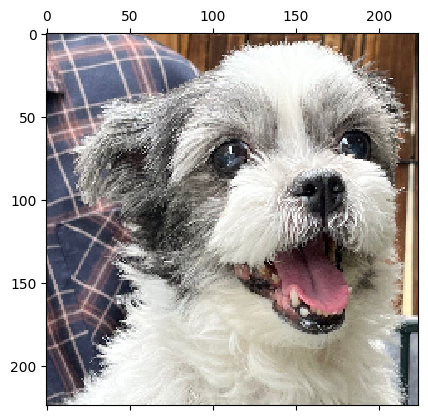

In [22]:
image_path='/content/Yeon.jpg' # ÏÇ¨ÏßÑ Í≤ΩÎ°úÎ°ú ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî!
img = image.load_img(image_path, target_size=(224,224))
plt.matshow(img)

### 3) Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨ & ÏòàÏ∏° Í≤∞Í≥º ÌôïÏù∏
ResNet50 Î™®Îç∏Ïóê Ïù¥ÎØ∏ÏßÄÎ•º ÎÑ£Í∏∞ Ï†ÑÏóê ÏûÖÎ†• ÌòïÌÉúÏóê ÎßûÍ≤å Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.  
- `img_to_array` : Ïù¥ÎØ∏ÏßÄÎ•º Ïà´Ïûê Î∞∞Ïó¥Î°ú Î≥ÄÌôò  
- `expand_dims` : Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä (Î™®Îç∏ ÏûÖÎ†•ÏùÄ `(Î∞∞Ïπò, ÎÜíÏù¥, ÎÑàÎπÑ, Ï±ÑÎÑê)` ÌòïÌÉú)  
- `preprocess_input` : ResNet50 ÌïôÏäµ Ïãú ÏÇ¨Ïö©Îêú Î∞©ÏãùÎåÄÎ°ú Ï†ïÍ∑úÌôî  

ÎßàÏßÄÎßâÏúºÎ°ú `predict`Î•º ÌÜµÌï¥ Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.


In [23]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = resnet50.preprocess_input(x)

preds=model.predict(x)
print("ÏòàÏ∏° Í≤∞Í≥º:", resnet50.decode_predictions(preds,top=5)[0])

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6s/step
35363/35363 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
ÏòàÏ∏° Í≤∞Í≥º: [('n02086240', 'Shih-Tzu', np.float32(0.662882)), ('n02098413', 'Lhasa', np.float32(0.3285869)), ('n02085936', 'Maltese_dog', np.float32(0.003758074)), ('n02097474', 'Tibetan_terrier', np.float32(0.0014243702)), ('n02093754', 'Border_terrier', np.float32(0.0010772926))]


Ï∂úÎ†•Îêú Í≤∞Í≥ºÎäî Î™®Îç∏Ïù¥ Ïù∏ÏãùÌïú Top-5 ÌÅ¥ÎûòÏä§ÏôÄ ÌôïÎ•†ÏûÖÎãàÎã§.  
ÏòàÎ•º Îì§Ïñ¥ `Labrador retriever` ÎòêÎäî `Golden retriever` Ïùò ÌÅ¥ÎûòÏä§Î°ú ÎÜíÏùÄ ÌôïÎ•†Î°ú ÏòàÏ∏°Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§!

Îòê Îã§Î•∏ ÏòàÏãúÏùò Í≤ΩÏö∞ÏóêÎäî `Shih-Tzu`Ïùò ÌÅ¥ÎûòÏä§Î°ú ÎÜíÏùÄ ÌôïÎ•†Î°ú ÏòàÏ∏°Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§!


### 4) Grad-CAM Heatmap ÏÉùÏÑ±
Ïù¥Ï†ú Grad-CAMÏùÑ Íµ¨ÌòÑÌï¥Î¥ÖÎãàÎã§. ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:
1. ÎßàÏßÄÎßâ Convolution LayerÏùò Ï∂úÎ†•ÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞ (`conv5_block3_out`)  
2. Ïù¥ Ï∂úÎ†•Ïóê ÎåÄÌï¥ Í¥ÄÏã¨ ÏûàÎäî ÌÅ¥ÎûòÏä§(class_id)Ïùò GradientÎ•º Í≥ÑÏÇ∞  
3. Ï±ÑÎÑêÎ≥Ñ Gradient ÌèâÍ∑†Í∞í(`pooled_grads`)ÏùÑ Feature MapÏóê Í∞ÄÏ§ëÏπòÎ°ú Í≥±Ìï¥Ï§å  
4. Ï±ÑÎÑêÎ≥Ñ Í≤∞Í≥ºÎ•º Ìï©Ï≥ê Heatmap ÏÉùÏÑ±  

Ï¶â, "Ïù¥ ÌÅ¥ÎûòÏä§ ÏòàÏ∏°Ïóê Í∞ÄÏû• Ï§ëÏöîÌïú ÏòÅÏó≠"ÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌëúÌòÑÌïòÍ≤å Îê©ÎãàÎã§.


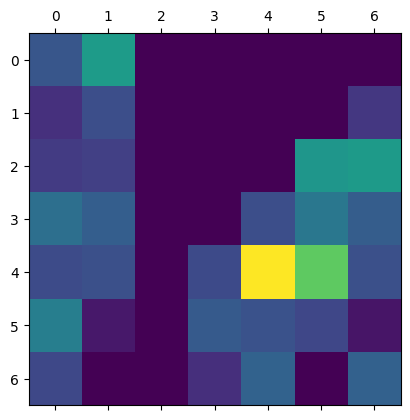

In [24]:
last_conv_layer=model.get_layer("conv5_block3_out")

model_1 = keras.Model(model.inputs,last_conv_layer.output)

input_2 = keras.Input(shape = last_conv_layer.output.shape[1:])
x_2=model.get_layer("avg_pool")(input_2)
x_2=model.get_layer("predictions")(x_2)
model_2=keras.Model(input_2,x_2)

with tf.GradientTape() as tape:
  output_1=model_1(x)
  tape.watch(output_1)
  preds=model_2(output_1)
  class_id=tf.argmax(preds[0])
  output_2=preds[:,class_id]

grads = tape.gradient(output_2,output_1)
pooled_grads = tf.reduce_mean(grads,axis=(0,1,2))

output_1 = output_1.numpy()[0]
pooled_grads=pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
  output_1[:,:,i]*=pooled_grads[i]
heatmap=np.mean(output_1,axis=-1)

heatmap=np.maximum(heatmap,0)/np.max(heatmap)
plt.matshow(heatmap)

ÏúÑ Í≤∞Í≥ºÎ°ú Ï∂úÎ†•Îêú HeatmapÏùÄ Î™®Îç∏Ïù¥ Ïñ¥Îñ§ ÏòÅÏó≠ÏùÑ ÏßëÏ§ëÏ†ÅÏúºÎ°ú Î≥¥ÏïòÎäîÏßÄÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.  
ÏïÑÏßÅÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ Î∂ÑÎ¶¨Îêú ÌòïÌÉúÎùºÏÑú "Í∞ïÏïÑÏßÄÏùò Î™∏ÌÜµ" ÎòêÎäî "ÏñºÍµ¥" Í∞ôÏùÄ Î∂ÄÏúÑÎ•º ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÍ∏¥ Ïñ¥Î†µÏäµÎãàÎã§.


### 5) HeatmapÏùÑ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Overlay
ÎßàÏßÄÎßâÏúºÎ°ú HeatmapÏùÑ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê Í≤πÏ≥êÏÑú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.  
- `jet colormap`ÏùÑ Ïù¥Ïö©Ìï¥ HeatmapÏóê ÏÉâÏÉÅÏùÑ ÏûÖÌûò  
- ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Ïóê ÎßûÍ≤å Resize  
- Overlay ÌõÑ Í≤∞Í≥º ÏãúÍ∞ÅÌôî

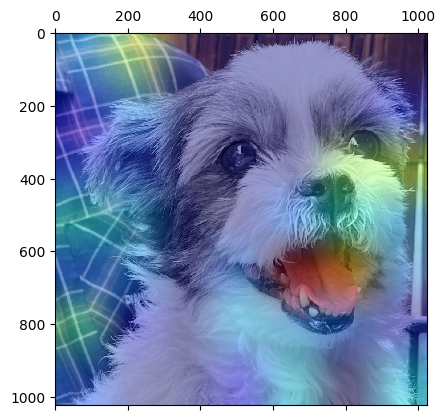

In [25]:
img=image.load_img(image_path)

img=image.img_to_array(img)
heatmap=np.uint8(255*heatmap)

jet=cm.get_cmap("jet")
color=jet(np.arange(256))[:,:3]
color_heatmap = color[heatmap]

color_heatmap = keras.preprocessing.image.array_to_img(color_heatmap)
color_heatmap = color_heatmap.resize((img.shape[1],img.shape[0]))
color_heatmap = keras.preprocessing.image.img_to_array(color_heatmap)

overlay_img=color_heatmap*0.7+img
overlay_img=keras.preprocessing.image.array_to_img(overlay_img)
plt.matshow(overlay_img)

Ïù¥Î•º ÌÜµÌï¥ **Î™®Îç∏Ïù¥ Ïã§Ï†úÎ°ú Í∞ïÏïÑÏßÄÏùò Ïñ¥Îäê Î∂ÄÏúÑÎ•º Î≥¥Í≥† 'Í∞ïÏïÑÏßÄ'ÎùºÍ≥† Ïù∏ÏãùÌñàÎäîÏßÄ** ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§!

**Q3** Î≥∏Ïù∏Ïùò Grad-CAM Í≤∞Í≥ºÎ•º Î≥¥Í≥†, ÏòàÏ∏°Ïóê ÏßëÏ§ëÌïú Ïù¥ÎØ∏ÏßÄ ÏòÅÏó≠Ïù¥ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÎßûÎäîÏßÄ ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî

**A. ÌÅ¥ÎûòÏä§ ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä ground-truth ÌÅ¥ÎûòÏä§ÏôÄ ÎèôÏùºÌïú Í≤ÉÍ≥ºÎäî Î≥ÑÍ∞úÎ°ú, ÏòàÏ∏°Ïóê ÏßëÏ§ëÌïú Ïù¥ÎØ∏ÏßÄ ÏòÅÏó≠Ïù¥ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÎßûÎäîÏßÄÎäî ÌôïÏù∏Ìï† Ïàò ÏóÜÏóàÎã§.**

Î≥∏Ïù∏ÏùÄ `dog`Í≥º `Shih-Tsu`Ïùò ÌäπÏßïÏùÑ ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥, Î™®Îç∏Ïù¥ Í∞úÏùò ÏñºÍµ¥Í≥º ÏÉâÍπî ÏûàÎäî ÌÑ∏ Î∂ÄÎ∂ÑÏóê ÏßëÏ§ëÌï† Í≤ÉÏù¥Îùº ÏòàÏ∏°ÌñàÎã§. Í∑∏Îü¨ÎÇò Grad-CAMÏúºÎ°ú ÌôïÏù∏Ìïú Í≤∞Í≥º, Î™®Îç∏ÏùÄ Í∞úÏùò ÏûÖ Î∂ÄÎ∂ÑÏùÑ ÏòàÏ∏°Ïóê ÏßëÏ§ëÌïú Ïù¥ÎØ∏ÏßÄ ÏòÅÏó≠ÏúºÎ°ú ÏÑ§Î™ÖÌñàÎã§.